In [1]:
#Kandidatnummer: 10001 og 10146

In [2]:
from graph_utils.graph import Graph, nx, plt
from graph_utils.grid_graph import GridGraph
from graph_utils.constructed_graph import ConstructedGraph
from graph_utils.watts_strogatz import WattsStrogatz
from graph_utils.barabasi_albert import BarabasiAlbert
from graph_utils.real_network_graph import RealNetworkGraph
from graph_utils.vdes_graph import VDESGraph
import matplotlib
import numpy as np
import operator
import matplotlib.pyplot as plt

# Del 1: Introduksjon
I denne delen skal vi bli kjent med hvordan man plotter grafer.
## Oppgave 1.1
Lag en graf ved å først opprette et objekt av klassen <code>Graph</code>. Legg deretter til 5-10 noder ved å bruke metoden <code>add_node()</code> eller <code>add_nodes_from()</code>. Legg så til kanter mellom de nodene du ønsker ved å bruke <code>add_edge()</code> eller <code>add_edges_from()</code>. Bruk til slutt metoden <code>draw()</code> for å tegne grafen.

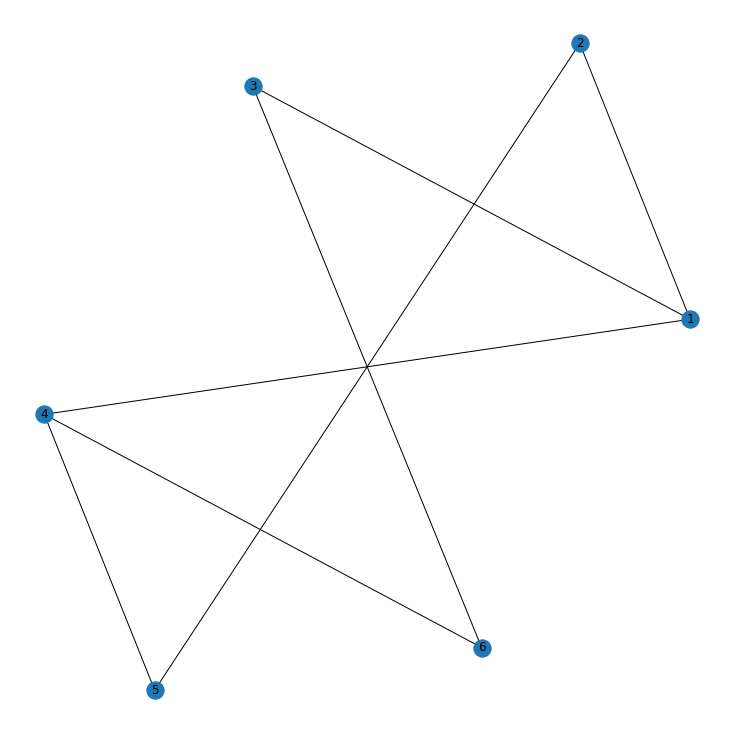

In [3]:
graf = Graph(seed=1234)
graf.add_node(1)
graf.add_nodes_from([2,3,4,5,6])
graf.add_edge(1,2)
graf.add_edges_from([(1,3),(1,4),(2,5),(4,6),(3,6),(4,5)])
graf.draw()


## Oppgave 1.2
Man kan finne antall noder ved å bruke metoden <code>number_of_nodes()</code>. Prøv den ut på grafobjektet du opprettet i forrige oppgave og print resultatet.

In [4]:
print(graf.number_of_nodes())

6


## Oppgave 1.3
På samme måte som med noder kan man finne antallet kanter i grafen med metoden <code>number_of_edges()</code>. Bruk den på grafen fra oppgave 1.1 til å finne antall kanter i grafen og print resultatet.

In [5]:
print(graf.number_of_edges())

7


## Oppgave 1.4
Opprett et <code>GridGraph</code>-objekt med 5 x 5 noder. Tegn korteste vei mellom node (4, 4) og (1, 2) med metoden <code>mark_shortest_path()</code>.

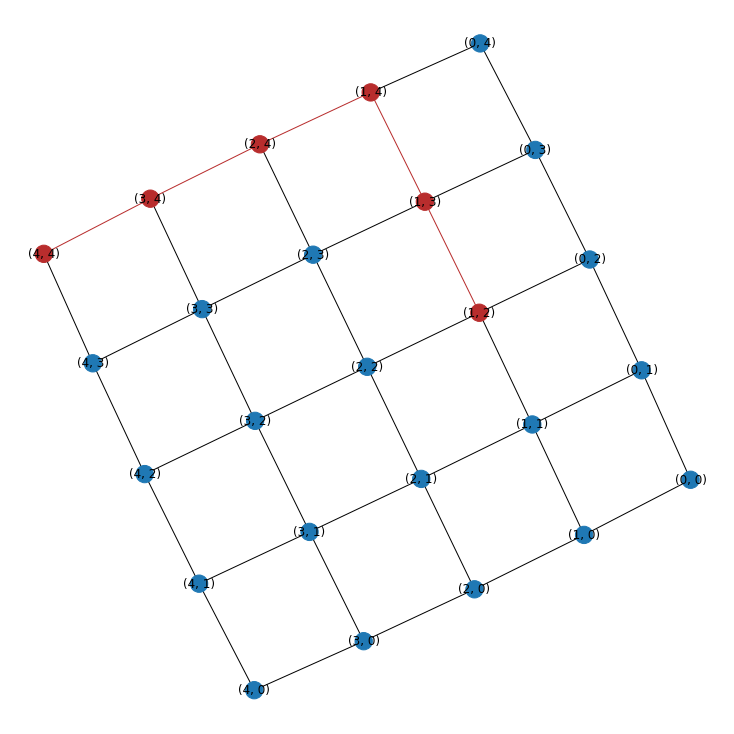

In [6]:
grid = GridGraph(5,5)
grid.mark_shortest_path((4, 4),(1,2))

## Oppgave 1.5
Vi skal forsette å bruke grafen fra forrige oppgave. Fjern node (1, 3) og (2, 2) ved å bruke metoden <code>remove_node()</code>. Finn nå korteste vei mellom node (4, 4) og (1, 2) og tegn resultatet. (Merk at nodene ikke nødvendigvis blir tegnet på samme steder som i forrige oppgave, men den tegner en isomorf graf)

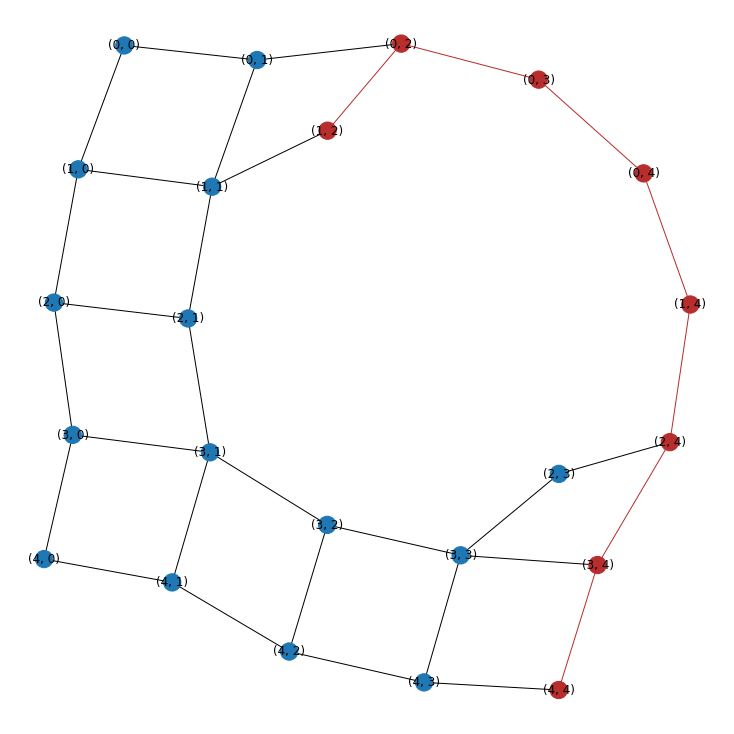

In [7]:
grid.remove_node((1,3))
grid.remove_node((2,2))
grid.mark_shortest_path((4, 4),(1,2))

## Oppgave 1.6
Hvor mange noder må minst slettes for at korteste vei mellom node (4, 4) og (1, 2) skal bli lenger enn den var i oppgave 1.5, men at det fremdeles finnes en vei?

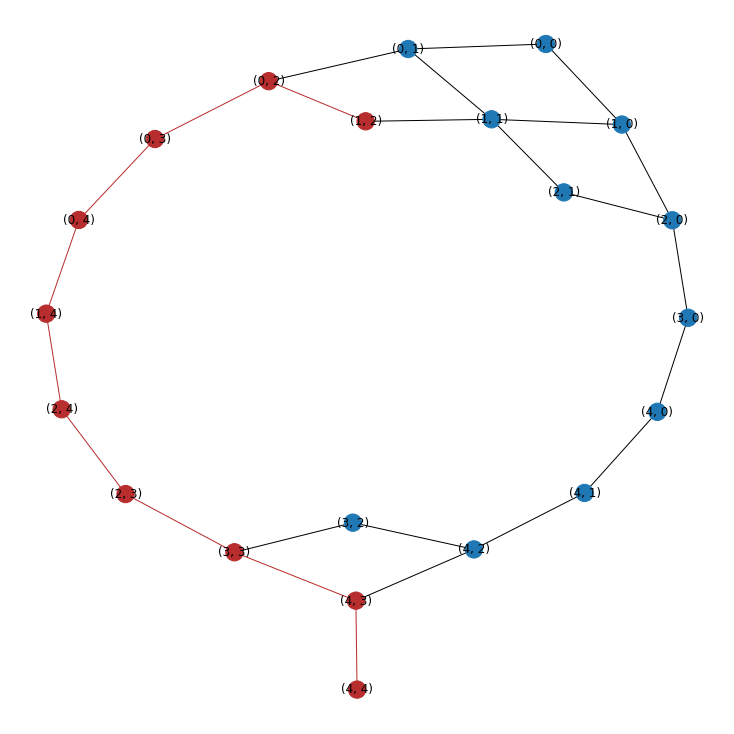

In [8]:
grid.remove_node((3,1))
grid.remove_node((3,4))
grid.mark_shortest_path((4, 4),(1,2))

Hvor mange noder må slettes for at det ikke skal eksistere noen vei mellom node (4, 4) og (1, 2), med utgangspunkt i grafen slik den er i oppgave 1.5?

In [9]:
# Kodecelle hvis du vil teste

## Oppgave 1.7
Opprett et <code>WattsStrogatz</code>-objekt med parametre n=100, k=4 og p=0.1.
Tegn så grafen, og finn korteste vei mellom node 53 og 75.


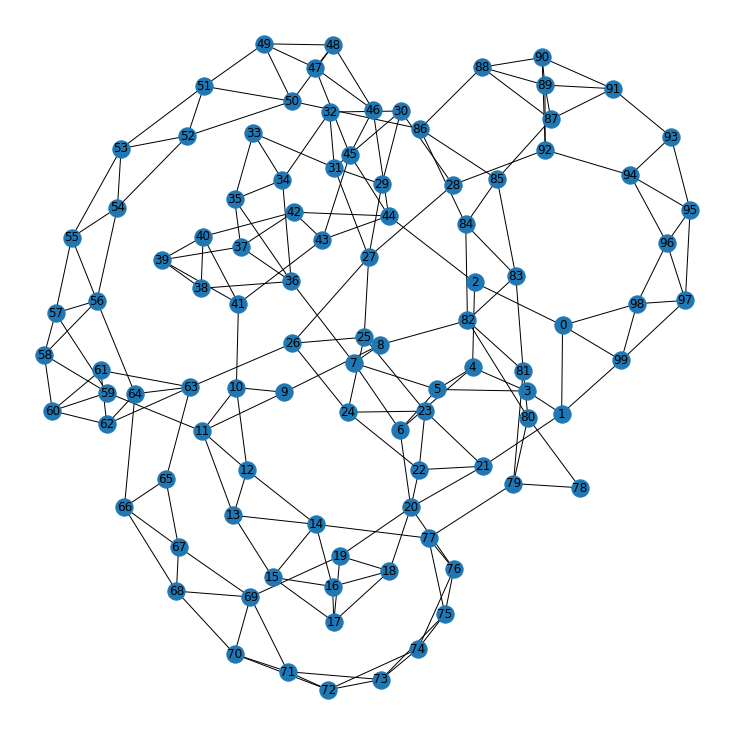

In [10]:
ws1 = WattsStrogatz(n=100, k=4, p=0.1, seed=69)
ws1.draw()

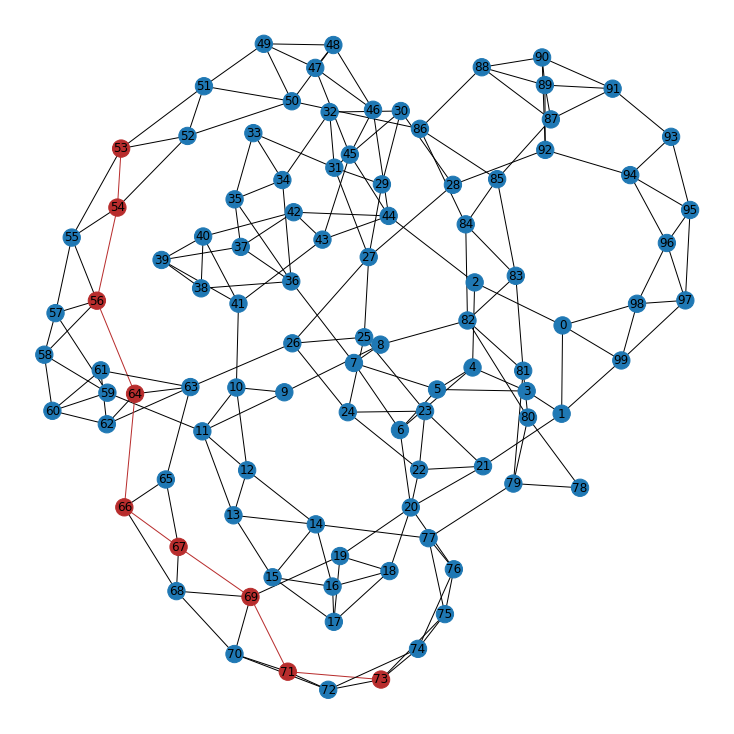

In [11]:
ws1.mark_shortest_path(53,73)

# Del 2: Strukturanalyse
## Oppgave 2.1

Lag følgende 4 grafer, alle med 100 noder:
* Graf 1: En Barabasi Albert graf med parameter m=1
* Graf 2: En Barabasi Albert graf med parameter m=2
* Graf 3: En Watts Strogatz graf med parametre k=2 og p=0.1
* Graf 4: En Watts Strogatz graf med parametre k=4 og p=0.1

Du trenger ikke tegne grafene, bare opprett et objekt for hver graf. Det kan likevel være lurt å tegne grafen for din egen del, så du vet hvordan den ser ut.

In [12]:
ba1 = BarabasiAlbert(n=100, m=1)
ba2 = BarabasiAlbert(n=100, m=2, seed=ba1.seed)
ws2 = WattsStrogatz(n=100, k=2, p=0.1, seed=69)
ws3 = ws1

## Oppgave 2.2
For hver av de fire grafene: lag et histogram som viser degree distribution. 
* Bruk metoden <code>histogram()</code> for å gjøre dette. 
* Kommenter så kort hva du diagrammet illustrerer.

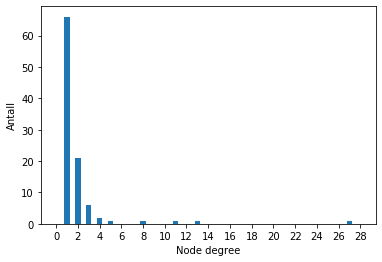

[0,
 66,
 21,
 6,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [13]:
ba1.histogram()

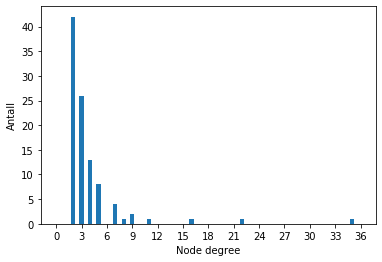

[0,
 0,
 42,
 26,
 13,
 8,
 0,
 4,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [14]:
ba2.histogram()

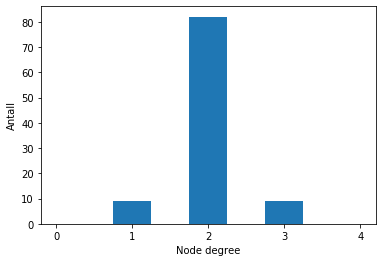

[0, 9, 82, 9]

In [15]:
ws2.histogram()

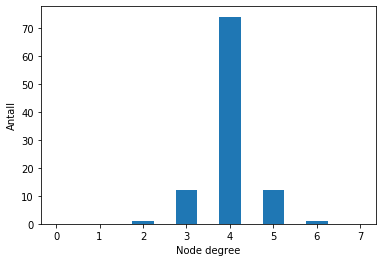

[0, 0, 1, 12, 74, 12, 1]

In [16]:
ws3.histogram()

## Oppgave 2.3 
Kommenter resultatene med hensyn på sårbarheter for hver av de 4 grafene i forrige oppgave.

## Oppgave 2.4
Hvordan endrer degree distribution seg for en Barabasi Albert graf seg når m øker fra 1 til 2? Forklar hvorfor.

## Oppgave 2.5 
Hvordan endrer degree distribution seg for en Watts Strogats graf seg når k øker fra 2 til 4? Forklar hvorfor.

## Oppgave 2.6
Hvordan endrer degree distribution seg for en Watts Strogats graf dersom p øker? Test det ut og forklar hvorfor.

In [17]:
# Eventuell kode her


## Oppgave 2.7
Hva sier degree distribution om nettverket?

## Oppgave 2.8
* Hent ut de 5 viktigste nodene i forhold til closeness centrality for graf 1 og graf 2 og finn deres verdi. 
* Marker så nodene på grafene og kommenter viktigheten av de 5. 
* Sammenlign mellom grafene hvor disse nodene spiller størst rolle.


-- graf 1 --
Node: Verdi
1  :  0.4647887323943662
2  :  0.391304347826087
5  :  0.35231316725978645
0  :  0.34256055363321797
11  :  0.32459016393442625

-- graf 2 --
Node: Verdi
2  :  0.5755813953488372
3  :  0.5025380710659898
1  :  0.48292682926829267
4  :  0.4342105263157895
15  :  0.4342105263157895

closeness_centrality er summen av kortest vei fra en node til alle andre noder, dvs. at  de spiller en sentral rolle der en node A ofte må innom (en eller flere) av disse 5 for korteste vei til en node B


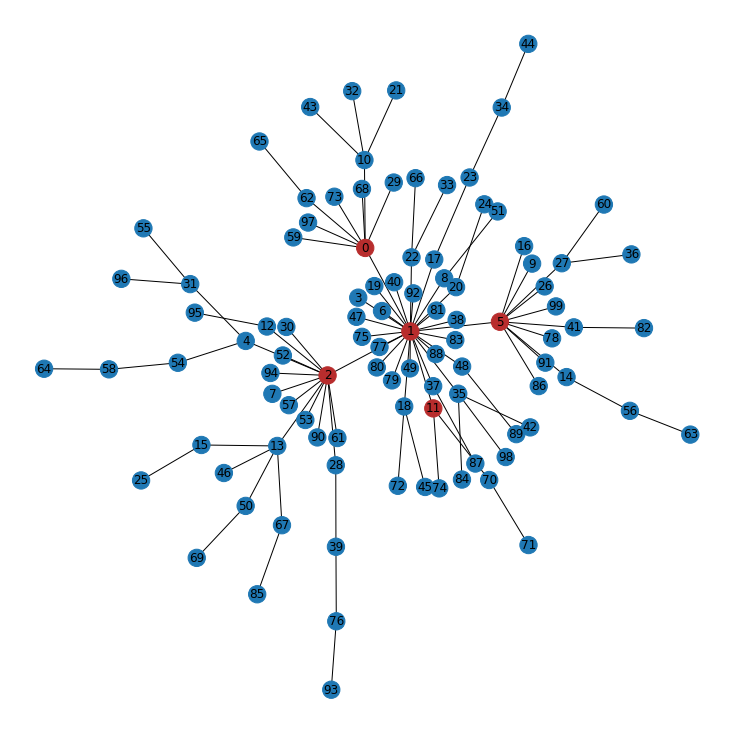

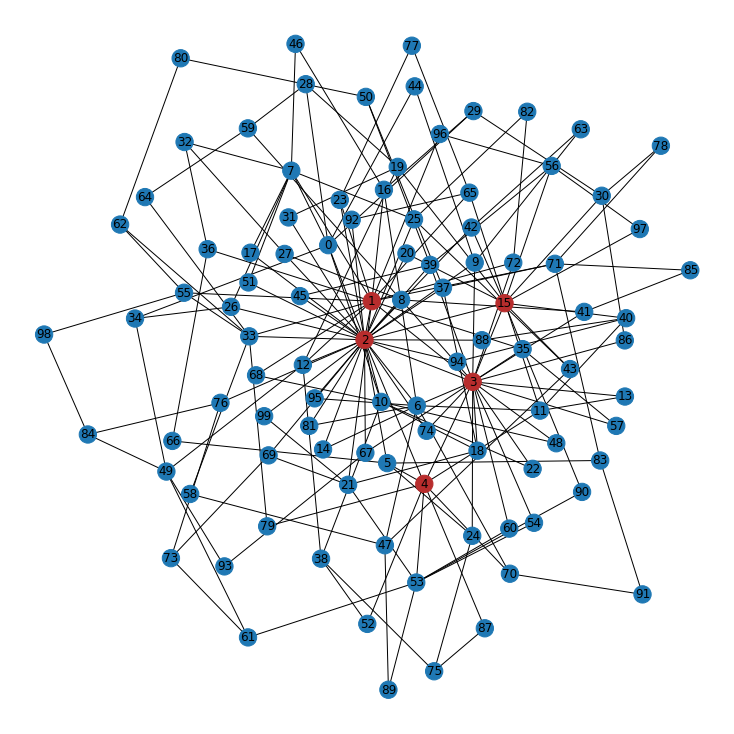

In [18]:
# Assume the task is about the graphs in task 2.1
myGraf1 = ba1.closeness_centrality()
myGraf2 = ba2.closeness_centrality()
graft1High = []
graft2High = []

print("\n-- graf 1 --\nNode: Verdi")
# graf 1
for x in range(0,5):
    k = max(myGraf1.items(), key=operator.itemgetter(1))[0]
    graft1High.append(k)
    v = max(myGraf1.items(), key=operator.itemgetter(1))[1]
    print (k," : ", v)
    del myGraf1[k]

print("\n-- graf 2 --\nNode: Verdi")    
# graf 2
for x in range(0,5):
    k = max(myGraf2.items(), key=operator.itemgetter(1))[0]
    graft2High.append(k)
    v = max(myGraf2.items(), key=operator.itemgetter(1))[1]
    print (k," : ", v)
    del myGraf2[k]
    
kommentar = "\ncloseness_centrality er summen av kortest vei fra en node til alle andre noder, dvs. at  de spiller en sentral rolle der en node A ofte må innom (en eller flere) av disse 5 for korteste vei til en node B"
print(kommentar)    
    
    

ba1.mark_nodes(graft1High)
ba2.mark_nodes(graft2High)

## Oppgave 2.9
For graf 4: Identifiser noder som har høy verdi av en indeks, men lav av en annen indeks. Tips: tegning illustreringen av centrality indexene for å se det ut ifra grafen. Hva blir konsekvensene dersom disse nodene feiler?

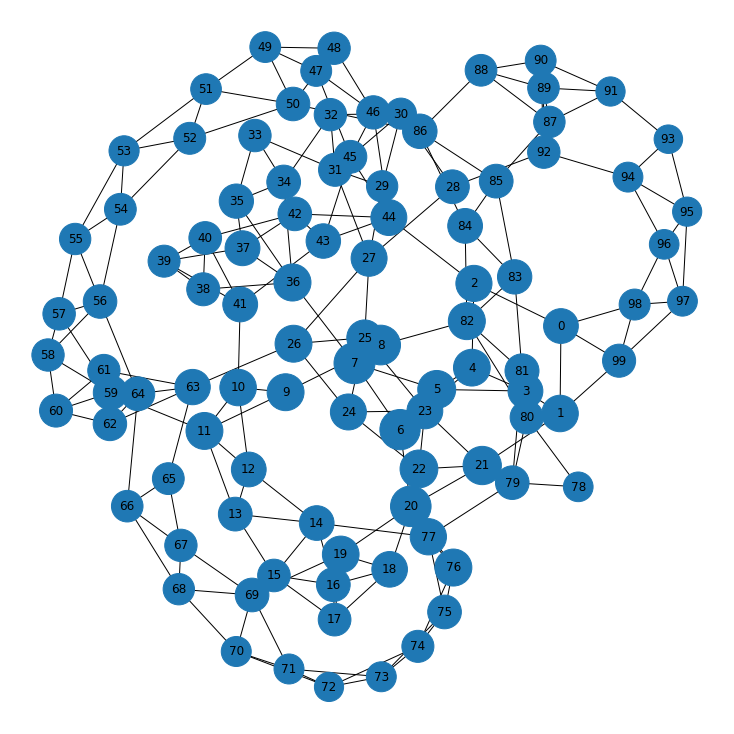

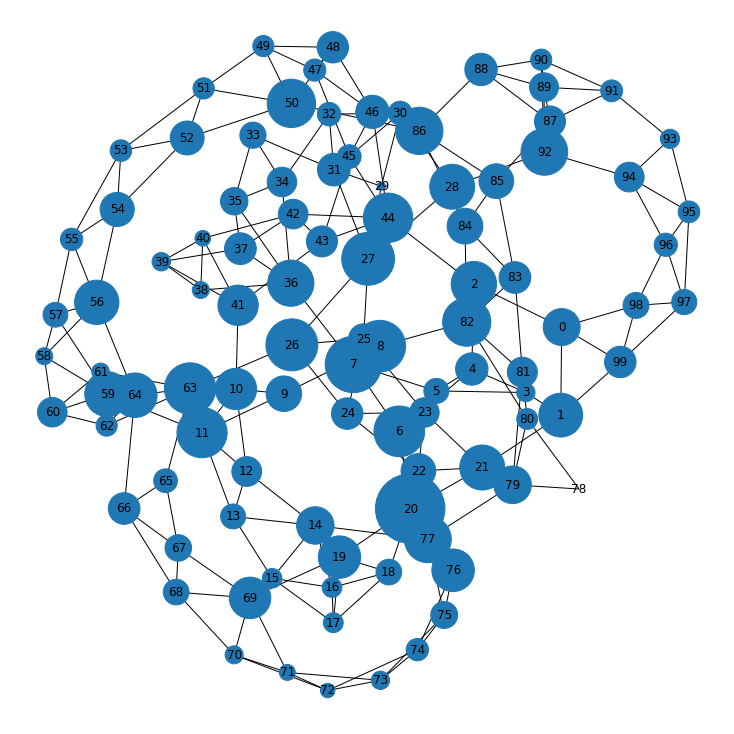

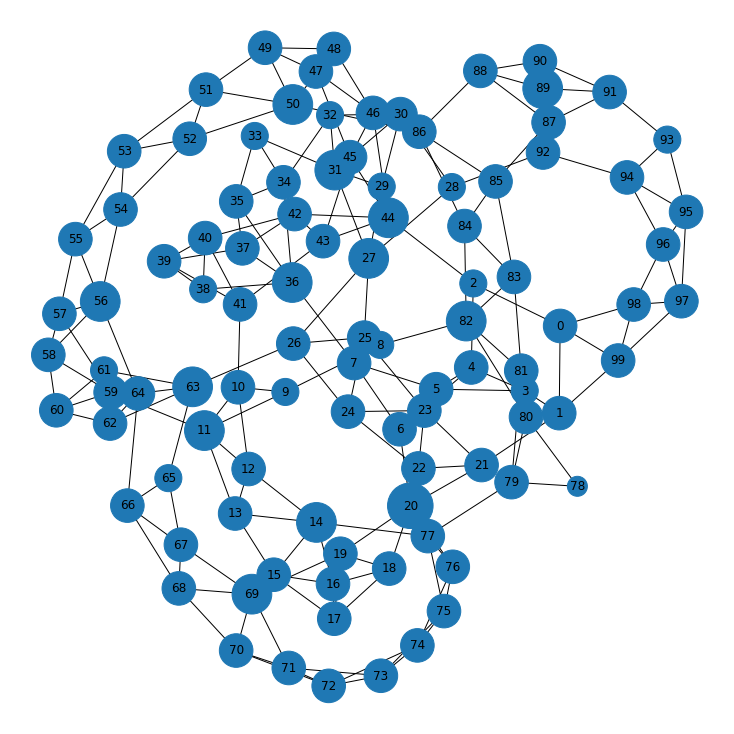

In [19]:
ws3.draw_closeness_centrality(1137)
ws3.draw_betweenness_centrality(1137)
ws3.draw_degree_centrality(1137)

# Node 19 og 7 har f.eks ganske høy betweenness og lav degree, som betyr at det er mange av 
# grafens "korteste veier" som går via 19 og 7, men at de ikke har så mange kanter tilknyttet andre noder
# følgelig kan vi påstå at nettverket vil få ganske redusert ytelse dersom en av disse feiler

## Oppgave 2.10
Konstruer et nettverk bestående av mellom 9 og 15 noder med en node som har høyest closeness centrality, og en av de laveste degree centrality verdiene. Tips: Siden grafen ikke er så stor kan det være lettere å hardkode noder og edges enn å generere de ved hjelp av en <code>for</code> loop.

In [20]:
networkGraph = Graph(seed=69420)
networkGraph.add_nodes_from([1,2,3,4,5,6,7,8,9])
networkGraph.add_edges_from([(5,4),(5,6),(4,3),(3,2),(2,1),(1,4),(6,7),(7,8),(8,9),(9,6)])

closeNetwork = networkGraph.closeness_centrality()
degreeNetwork = networkGraph.degree_centrality()

k1 = max(closeNetwork.items(), key=operator.itemgetter(1))[0]
v1 = max(closeNetwork.items(), key=operator.itemgetter(1))[1]
v2 = min(degreeNetwork.items(), key=operator.itemgetter(1))[1]

def findMinDegree():
    minDegree = {}
    for x in degreeNetwork:
        if degreeNetwork[x] == v2:
            minDegree[x] = degreeNetwork[x]
    print("lowest degree:\n",minDegree)


findMinDegree()
print("\nCloseness\n",k1,":",v1)

print("\n- Vi kan se at node 5 har størst closeness centrality, og delt laveste degree centrality verdiene -")

lowest degree:
 {1: 0.25, 2: 0.25, 3: 0.25, 5: 0.25, 7: 0.25, 8: 0.25, 9: 0.25}

Closeness
 5 : 0.5

- Vi kan se at node 5 har størst closeness centrality, og delt laveste degree centrality verdiene -


# Del 3: Analyse av Reelle nettverk
Her skal vi analysere og diskutere reelle/ simulerte nettverk.

## Oppgave 3.1
I denne oppgaven skal vi analysere Uninett sitt nettverk slik det var i 2011. Klassen <code>RealNetworkGraph</code> tar inn en url av en fil med filtypen <i>.graphml</i>. Lag et objekt for kjernenettet i Norge og tegn det. Filene som kan analyseres finnes på nettsiden <a href="http://www.topology-zoo.org/dataset.html">Topology Zoo</a>.

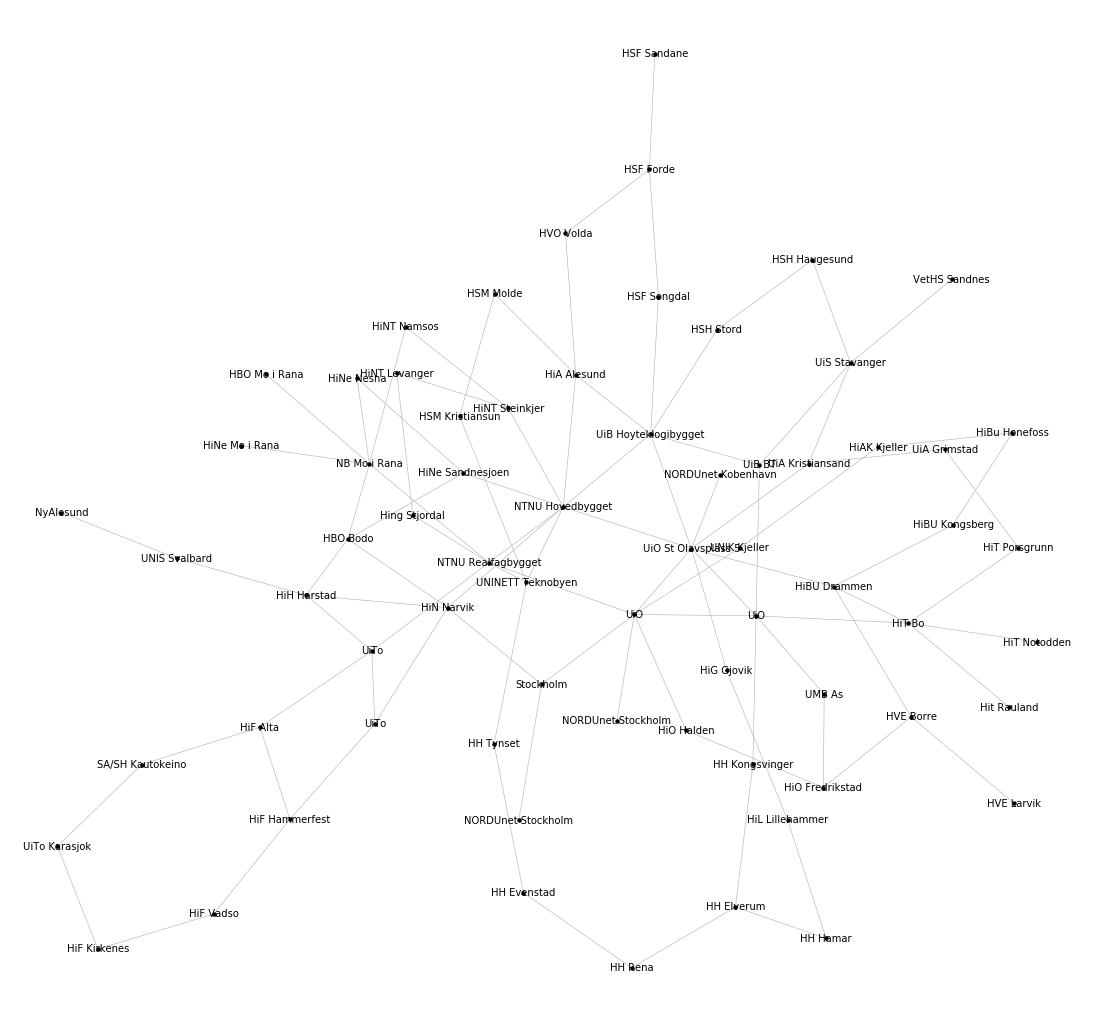

In [21]:
# Assuming we have to ctrl + F for uninett and copy link location for the 2011 result (graphml). 
# Yielding this link: http://www.topology-zoo.org/files/Uninett2011.graphml
core_network = RealNetworkGraph("http://www.topology-zoo.org/files/Uninett2011.graphml")
core_network.draw()

## Oppgave 3.2
Plot et histogram over degree distribution for nettverket til Uninett

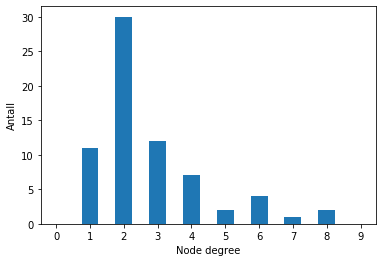

[0, 11, 30, 12, 7, 2, 4, 1, 2]

In [22]:
core_network.histogram()

## Oppgave 3.3
For hver av de tre centrality indeksene, print gjennomsnittlig centrality i nettverket til Uninett.

In [23]:
# Declaring the three centrality indexes mentioned in the lecure. Returns key/value pairs for each node
cn_close = core_network.closeness_centrality()
cn_between = core_network.betweenness_centrality()
cn_degree = core_network.degree_centrality()

def average(g):
    total = 0
    # Loop through nodes, find avg of the values
    for key in g:
        total += g[key]
    return total/len(g)

print(f"Average closeness: {round(average(cn_close), 3)}")
print(f"Average betweenness: {round(average(cn_between), 3)}")
print(f"Average degree: {round(average(cn_degree), 3)}")


Average closeness: 0.244
Average betweenness: 0.049
Average degree: 0.041


## Oppgave 3.4
Diskuter resultatene fra oppgave 3.2 og 3.3. Er nettverket robust? Forklar. <br>
Hvilket av nettverkene fra del 2 ligner Uninett sitt mest på?

## Oppgave 3.5
Constructed graph simulerer et reelt netverk. Den består av et kjernenett med en grid struktur, et regionalnett og et tettbebyggd aksessnett. Bruk klassen <code>ConstructedGraph</code> og tegn så grafen.

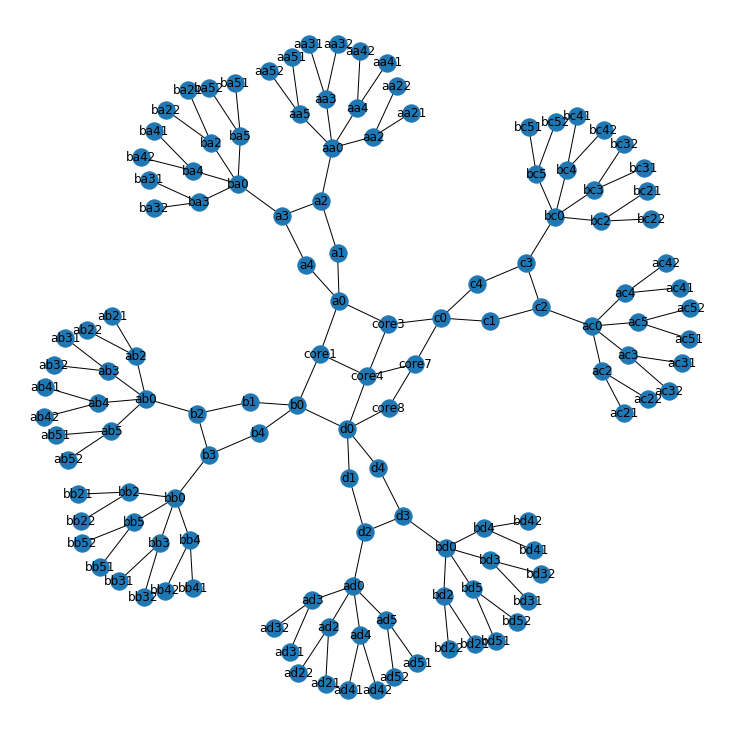

In [24]:
constructedGraph = ConstructedGraph()
constructedGraph.draw()

## Oppgave 3.6
Illustrer på grafen verdien av de tre centrality indeksene. Tips: bruk de metodene som er ferdiglagde.

Based on degree centrality: 
Based on closeness centrality: 
Based on betweenness centrality: 


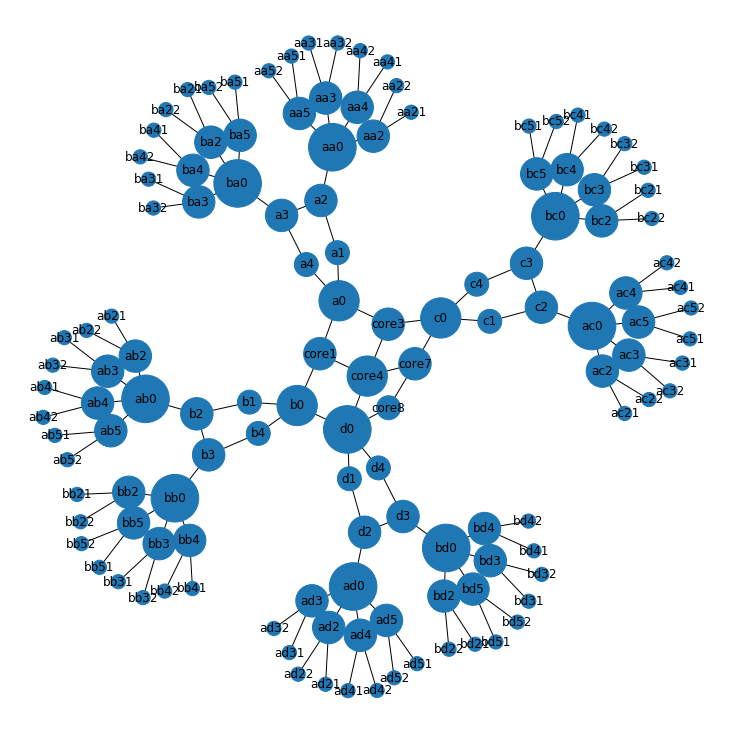

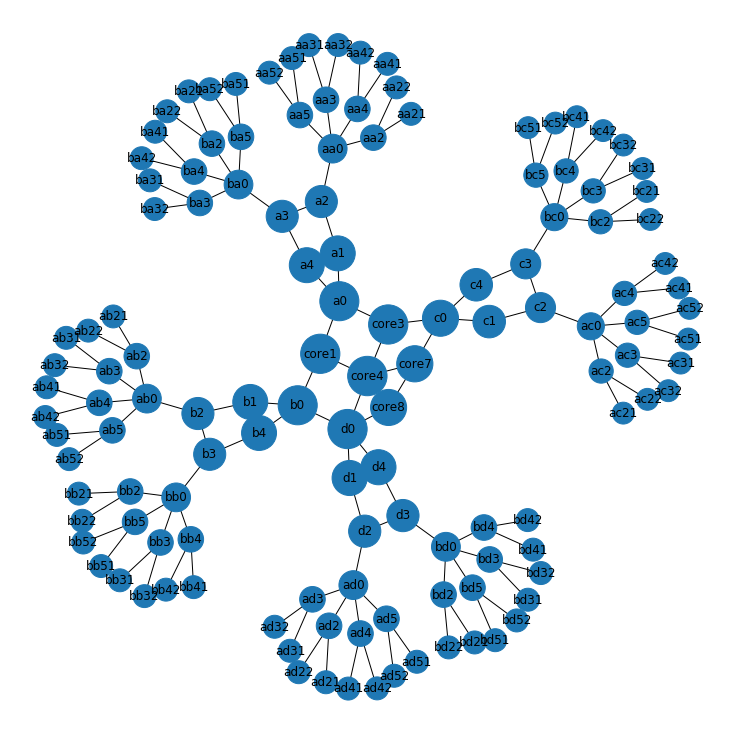

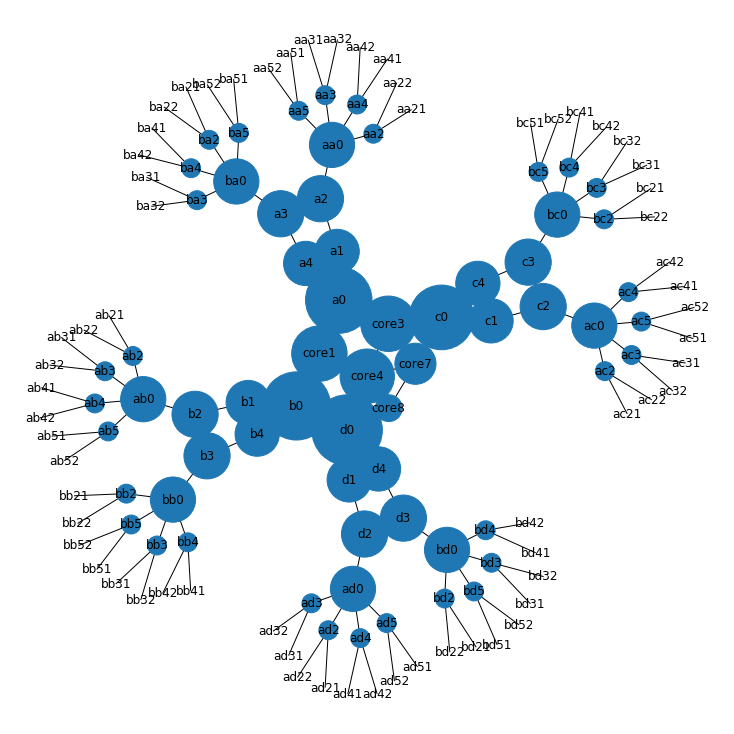

In [25]:
print("Based on degree centrality: ")
constructedGraph.draw_degree_centrality(avg_size=700)
print("Based on closeness centrality: ")
constructedGraph.draw_closeness_centrality(avg_size=700)
print("Based on betweenness centrality: ")
constructedGraph.draw_betweenness_centrality(avg_size=700)
# Det viser seg at det hender maskinen printer alt før grafene blir tegnet, men da ser man i hvert fall rekkefølgen

### Oppgave 3.7
Diskuter viktigheten og robustheten til regionalnettet.

# Del 4: Feil og Angrep på nettverk

## Nettverket som angripes
Bruk objektet <script>VDEGraph</script> i denne oppgaven. Grafen er et utsnitt av et VDES nettverk i aksjon der båtene snakker med hverandre, satelittene og de landbaserte radiotårnene.

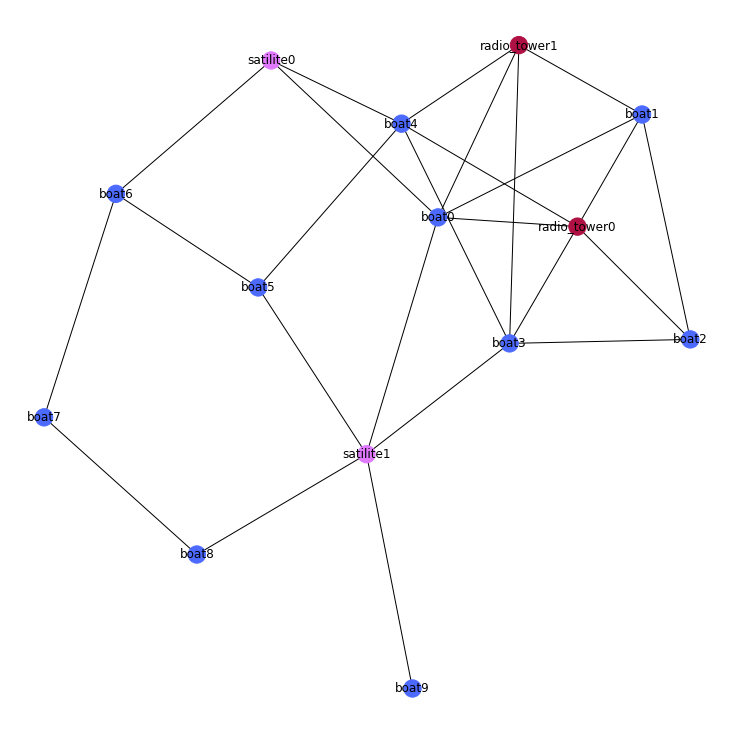

In [26]:
VDES = VDESGraph()
VDES.draw()

## 4.1 Analyse av nettverket

### 4.1.1 Sentraliteter
For å vite hvor vi skal angripe er det en fordel å vite hvor vi kan gjøre mest mulig skade.
Bruk de numeriske verdiene for de forskjellige centrality målene du lærte i de tidligere delene for ut hvilken node som er den viktigste i nettverket. 

In [27]:
closenessVDES = VDES.closeness_centrality()
degreeVDES = VDES.degree_centrality()
betweenessVDES = VDES.betweenness_centrality()

# Hjelpemetoder for å finne høyeste verdi (og hvis det er flere med like verdier, finne alle)
def findMaxDegree():
    maxDegree = {}
    v2 = max(degreeVDES.items(), key=operator.itemgetter(1))[1]
    for x in degreeVDES:
        if degreeVDES[x] == v2:
            maxDegree[x] = degreeVDES[x]
    print("\nhighest degree:\n",maxDegree)

def findMaxClosenness():
    maxClosenness = {}
    v1 = max(closenessVDES.items(), key=operator.itemgetter(1))[1]
    for x in closenessVDES:
        if closenessVDES[x] == v1:
            maxClosenness[x] = closenessVDES[x]
    print("\nhighest closeness:\n",maxClosenness)
    
def findMaxbetweeness():
    maxBetweeness = {}
    v3 = max(betweenessVDES.items(), key=operator.itemgetter(1))[1]
    for x in betweenessVDES:
        if betweenessVDES[x] == v3:
            maxBetweeness[x] = betweenessVDES[x]
    print("\nhighest betweeness:\n",maxBetweeness)

# for å enkelt kunne kalle alle på en gang
def findAllMaxCategories():
    findMaxDegree()
    findMaxClosenness()
    findMaxbetweeness()

findAllMaxCategories()

print("\n- Vi ser at 'satalite1' er har høyest verdi på alle centrality målene -")


highest degree:
 {'boat0': 0.38461538461538464, 'boat3': 0.38461538461538464, 'boat4': 0.38461538461538464, 'satilite1': 0.38461538461538464, 'radio_tower0': 0.38461538461538464}

highest closeness:
 {'satilite1': 0.6190476190476191}

highest betweeness:
 {'satilite1': 0.3496947496947496}

- Vi ser at 'satalite1' er har høyest verdi på alle centrality målene -


### 4.1.2 Sentraliteter del 2
* Illustrer sentralitetene grafisk. 
* Diskuter om nodene med lavest verdier på sentralitsmålene alltid er de minst viktige nodene i nettverket.

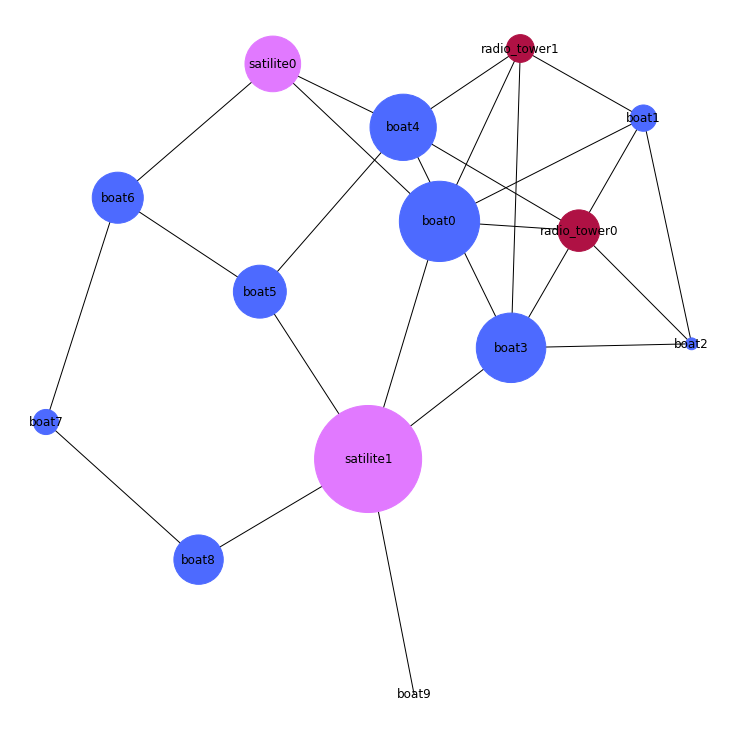

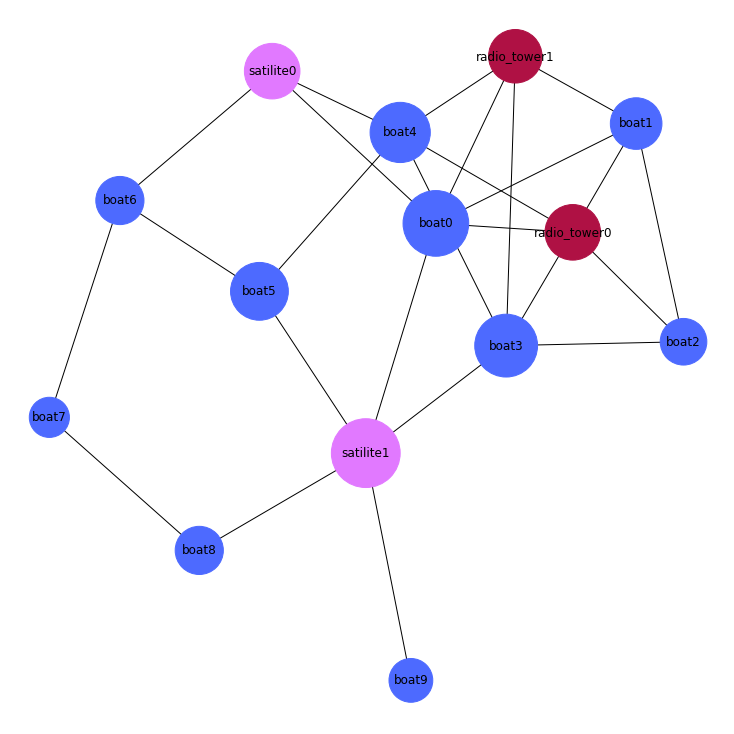

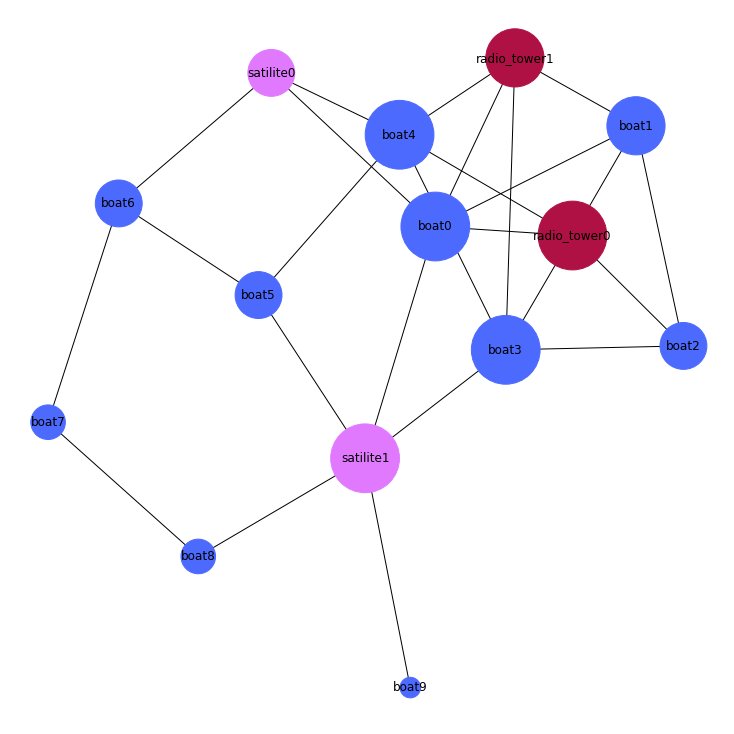

In [28]:
VDES.draw_betweenness_centrality(avg_size=3000)
VDES.draw_closeness_centrality(avg_size=3000)
VDES.draw_degree_centrality(avg_size=3000)

### 4.1.3 Annen analyse
Analyser nettverket med degree distribution og kanter per node. Diskuter robustheten bassert på de nevnte målene.

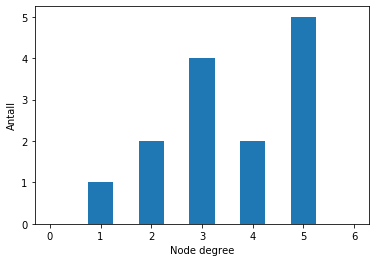

[0, 1, 2, 4, 2, 5]

In [29]:
VDES.histogram()

## 4.2 Angrep av nettverket/feil med nettverket
### 4.2.1 Tilfeldige feil
Bruk metoden <code>delete_random_nodes</code> for å angripe grafene med tilfeldige angrep.

<li>
    Fjern én node. Tegn så grafen.
</li>
<li>
    Fjern tre noder. Tegn så grafen
</li>


Random metoden her er seedet, altså vil den gi ut samme random hver gang.

Removed node boat3 using random_fault


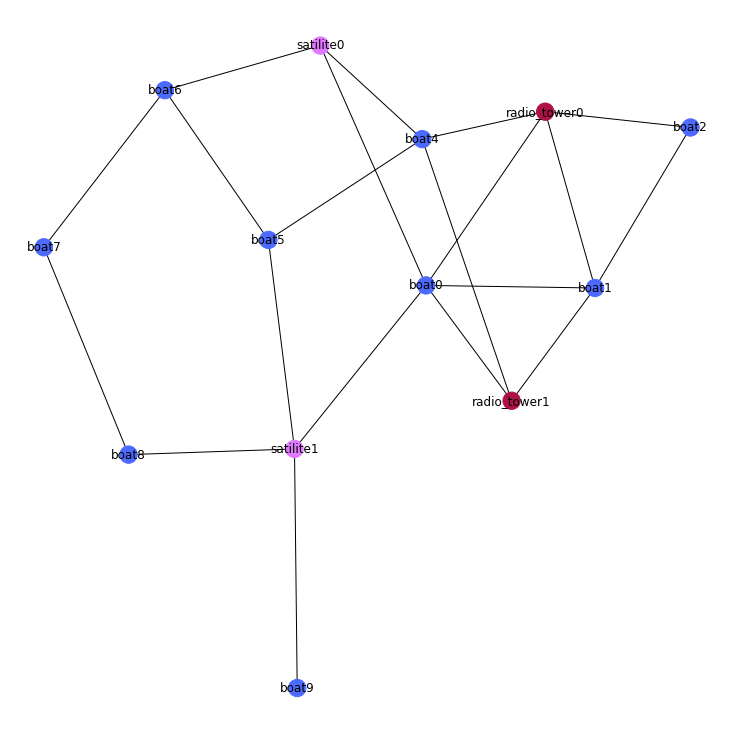

Removed node boat3 using random_fault
Removed node radio_tower1 using random_fault
Removed node boat5 using random_fault


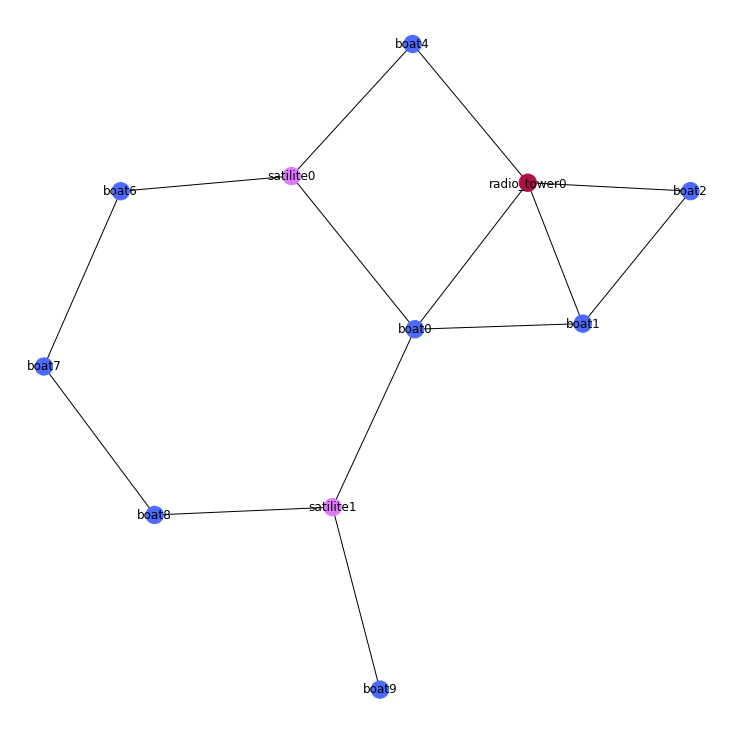

In [30]:
attackVDES = VDES.delete_random_nodes(1, print_result=True)
attackVDES.draw()
attackVDESrandom = VDES.delete_random_nodes(3, print_result=True)
attackVDESrandom.draw()

### 4.2.2 Enkelt angrep
Utfør ett enkelt målrettet angrep. Velg her den metoden som gjør mest skade og begrunn hvorfor.

Removed node satilite1 using closeness_centrality
- Fra oppg 4.1.1, får vi at Satalite1 har høyest verdi i alle kategoriene og vi utgjør dermed mest skade ved å angripe denne -


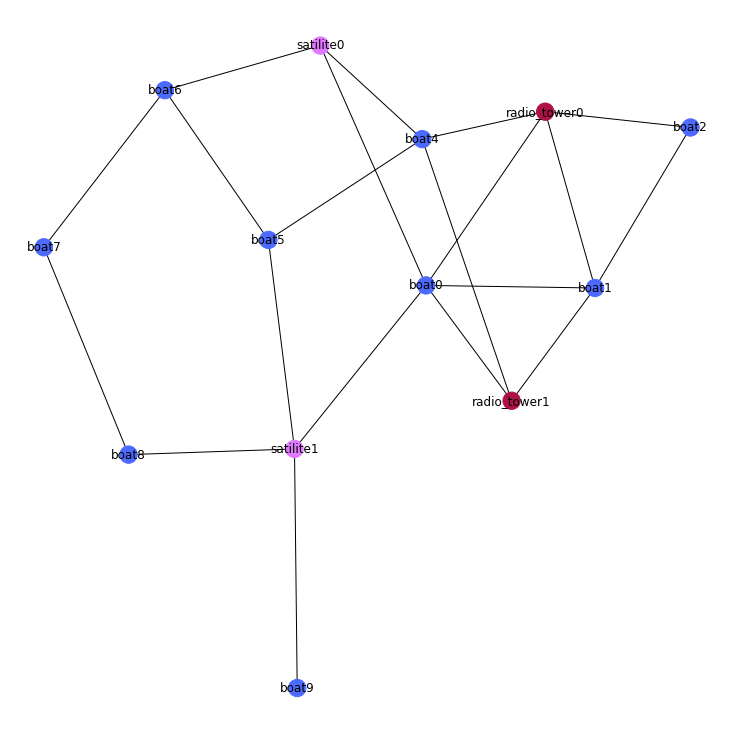

In [31]:
attackRandomVDES = VDES.delete_nodes_attack(n=1, centrality_index="closeness", print_result=True)
print("- Fra oppg 4.1.1, får vi at Satalite1 har høyest verdi i alle kategoriene og vi utgjør dermed mest skade ved å angripe denne -")
attackVDES.draw()

### 4.2.3 Flere angrep
Utfør 3 angrep totalt og utfør mest mulig skade. Sammenlign med like mange tilfeldige feil og forklar resultatet.


- Angrep 1 -
Removed node satilite1 using closeness_centrality


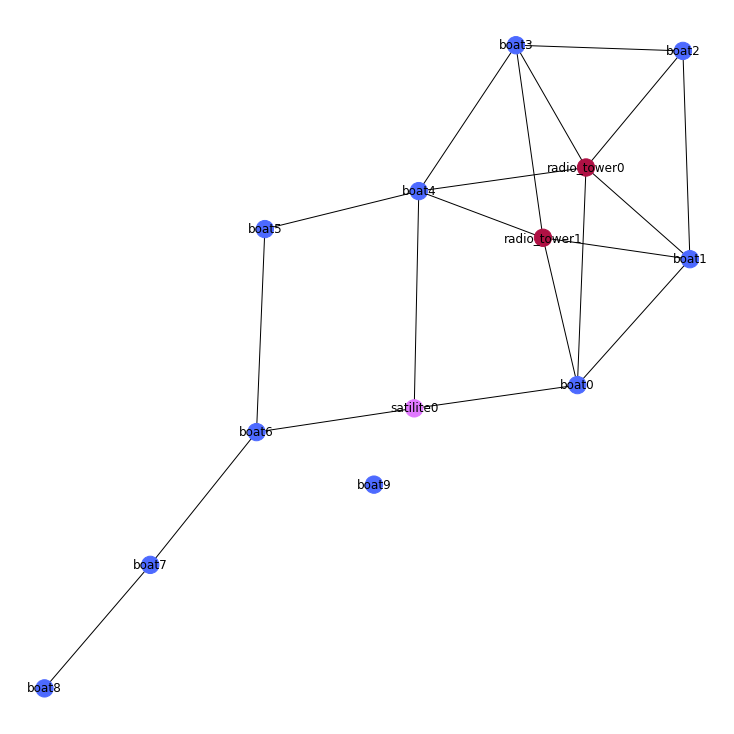

- Angrep 2 -

highest degree:
 {'boat4': 0.41666666666666663, 'radio_tower0': 0.41666666666666663}

highest closeness:
 {'boat4': 0.5041666666666667}

highest betweeness:
 {'boat6': 0.2840909090909091}

ser at båt 4 skårer høyest på degree og closeness
Removed node boat4 using closeness_centrality


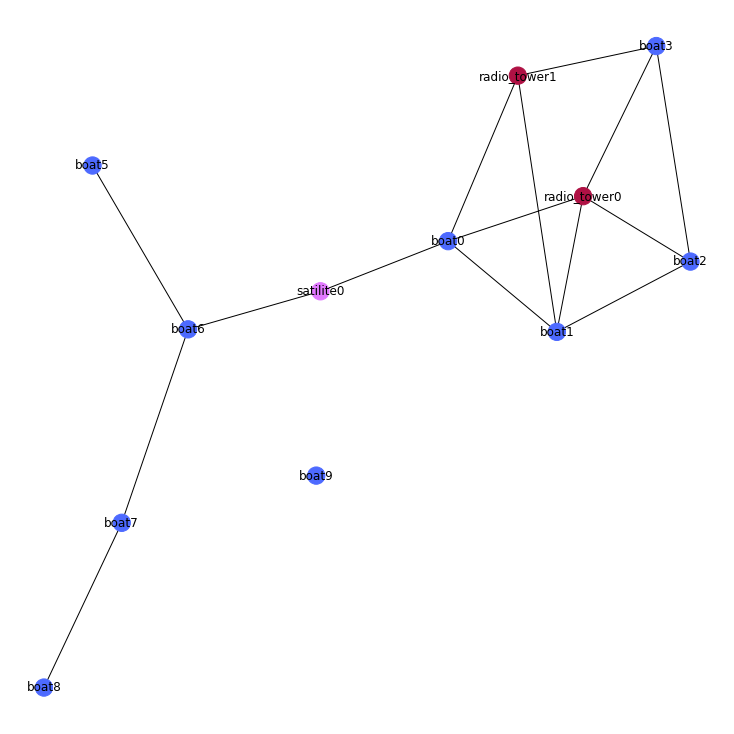

- Angrep 3 -

highest degree:
 {'boat0': 0.36363636363636365, 'boat1': 0.36363636363636365, 'radio_tower0': 0.36363636363636365}

highest closeness:
 {'boat0': 0.45454545454545453}

highest betweeness:
 {'boat0': 0.46060606060606063}

ser at båt 0 skårer høyest på alle kategorier
Removed node boat0 using closeness_centrality


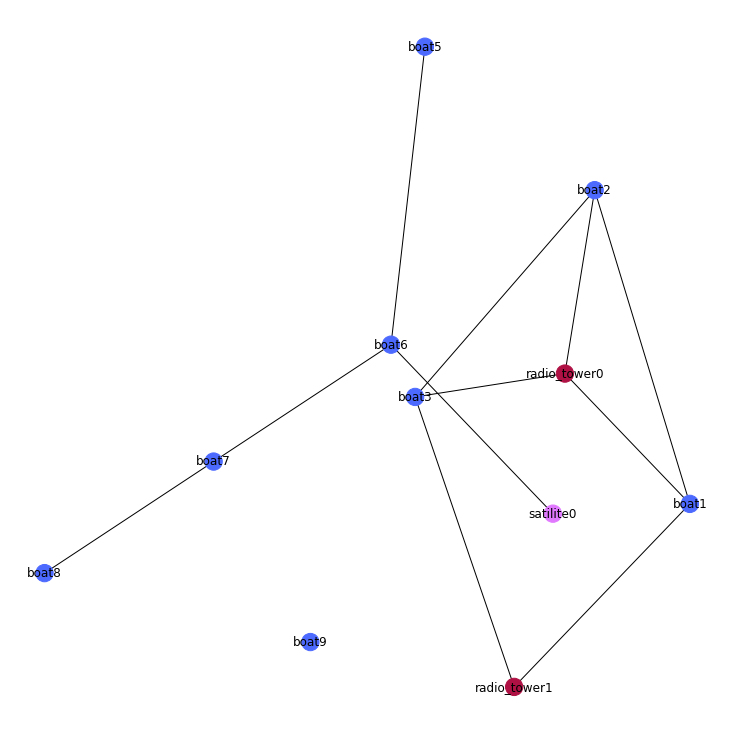

- Resultat etter angrep 3 -

highest degree:
 {'boat1': 0.30000000000000004, 'boat2': 0.30000000000000004, 'boat3': 0.30000000000000004, 'boat6': 0.30000000000000004, 'radio_tower0': 0.30000000000000004}

highest closeness:
 {'boat1': 0.32000000000000006, 'boat2': 0.32000000000000006, 'boat3': 0.32000000000000006, 'boat6': 0.32000000000000006, 'radio_tower0': 0.32000000000000006}

highest betweeness:
 {'boat6': 0.11111111111111112}


- Random angrep -

highest degree:
 {'boat4': 0.41666666666666663, 'radio_tower0': 0.41666666666666663}

highest closeness:
 {'boat4': 0.5041666666666667}

highest betweeness:
 {'boat6': 0.2840909090909091}


In [32]:
# attack 1
# vi har gjort utregning for mest skade ved første node i oppgaven over
print("\n- Angrep 1 -")
attackVDES = VDES.delete_nodes_attack(n=1, centrality_index="closeness", print_result=True)
attackVDES.draw()

# attack 2
closenessVDES = attackVDES.closeness_centrality()
degreeVDES = attackVDES.degree_centrality()
betweenessVDES = attackVDES.betweenness_centrality()
print("- Angrep 2 -")
findAllMaxCategories()
print("\nser at båt 4 skårer høyest på degree og closeness")
attackVDES2 = attackVDES.delete_nodes_attack(n=1, centrality_index="closeness", print_result=True)
attackVDES2.draw()

# attack 3
closenessVDES = attackVDES2.closeness_centrality()
degreeVDES = attackVDES2.degree_centrality()
betweenessVDES = attackVDES2.betweenness_centrality()
print("- Angrep 3 -")
findAllMaxCategories()
print("\nser at båt 0 skårer høyest på alle kategorier")
attackVDES3 = attackVDES2.delete_nodes_attack(n=1, centrality_index="closeness", print_result=True)
attackVDES3.draw()

# after attack 3
closenessVDES = attackVDES3.closeness_centrality()
degreeVDES = attackVDES3.degree_centrality()
betweenessVDES = attackVDES3.betweenness_centrality()
print("- Resultat etter angrep 3 -")
findAllMaxCategories()

# attack random nodes
closenessVDES = attackRandomVDES.closeness_centrality()
degreeVDES = attackRandomVDES.degree_centrality()
betweenessVDES = attackRandomVDES.betweenness_centrality()
print("\n\n- Random angrep -")
findAllMaxCategories()

### 4.2.4 Evaluering
Prøv å evaluere angrepene som du har gjort nå med metoder fra tidligere seksjoner.

In [33]:
# Din kode her

### 4.2.5 Evaluering part 2
For å videre evaluere angrepene vil vi introdusere "noder i største partisjon" som mål. 
Beregn størrelsen av største partisjon og sammenlign tilfeldig angrep med målrettet ved tre noder fjernet. 


In [34]:
print("calculated attack:",attackVDES3.get_largest_components_size())
print("random attack:",attackVDESrandom.get_largest_components_size())

print("\nVi kan her se at random attack ikke klarte å gjøre noen noder utilgjenglig for hverandre (utenom de som er fjernet).")
print("Sammenlignet med target attack hvor vi delte grafen i to, samtidig som vi gjorde boat9 utilgjengelig ved å fjerne satal0ite1")
print("Skadene er derfor utrolig forskjellig")

calculated attack: 5
random attack: 11

Vi kan her se at random attack ikke klarte å gjøre noen noder utilgjenglig for hverandre (utenom de som er fjernet).
Sammenlignet med target attack hvor vi delte grafen i to, samtidig som vi gjorde boat9 utilgjengelig ved å fjerne satal0ite1
Skadene er derfor utrolig forskjellig


### 4.2.6 Evaluering part 3
Diskuter fordeler og ulemper med noder i største partisjon som pålitelighetsmål. Er dette et fornuftig mål i vårt tilfelle?

### 4.2.7 Evaluering part 4
Drøft kort viktigheten av informasjonen rundt en nettverkstopologi.

## 4.3 Sikring av nettverket

### 4.3.1 Flere kanter
Legg til tre kanter for å sikre flest mulig noder mot angrep. Diskuter så hvorfor du la til de kantene du gjorde og om det nå er mer robust mot angrep.

In [35]:
# En bug gjør at jeg må fjerne kantene jeg legger til, men de viser fortsatt feil verdier
# VDES2.remove_edge("boat9","boat8")
# VDES2.remove_edge("boat7","boat5")
# VDES2.remove_edge("boat9","satilite0")
VDES2 = VDES

def findMinDegreeVDES():
    minDegree = {}
    degreeVDES = VDES2.degree_centrality()
    v2 = min(degreeVDES.items(), key=operator.itemgetter(1))[1]
    for x in degreeVDES:
        if degreeVDES[x] == v2:
            minDegree[x] = degreeVDES[x]
    print("lowest degree:\n",minDegree)


# kant 1
print("\n- adding edge 1 -")
findMinDegreeVDES()
VDES2.add_edge("boat9","boat8")
print("Adding edge between boat9 and boat8")

# kant 2
print("\n- adding edge 2 -")
findMinDegreeVDES()
VDES.add_edge("boat7","boat5")
print("Adding edge between boat7 and boat5")

# kant 3
print("\n- adding edge 3 -")
findMinDegreeVDES()
VDES.add_edge("boat9","satilite0")
print("Adding edge between boat9 and satilite0")



print("\nGrunnen til at jeg har lagt til disse kantene er for å gjøre noder med lav degree mer robuste. \nI tilegg hvis flere noder har samme degree kobler jeg til noden lengst unna, slik at Shortest path \n(closenness og betweenness øker) og omveien ikke blir så stor.")


- adding edge 1 -
lowest degree:
 {'boat9': 0.07692307692307693}
Adding edge between boat9 and boat8

- adding edge 2 -
lowest degree:
 {'boat7': 0.15384615384615385, 'boat9': 0.15384615384615385}
Adding edge between boat7 and boat5

- adding edge 3 -
lowest degree:
 {'boat9': 0.15384615384615385}
Adding edge between boat9 and satilite0

Grunnen til at jeg har lagt til disse kantene er for å gjøre noder med lav degree mer robuste. 
I tilegg hvis flere noder har samme degree kobler jeg til noden lengst unna, slik at Shortest path 
(closenness og betweenness øker) og omveien ikke blir så stor.


### 4.3.2 Plotting av robusthet
Antall noder i største partisjon er et eksempel på et mål for hvor mye av et nettverk som har overlevd. Plott et linjediagram (en graf) med antall noder i største komponent langs y_aksen, antall noder fjernet på x_aksen og fjern en etter en node med de 4 forskjellige angrepene. <br/>
Lag en funksjon for denne grafen. <br/> Bruk ConstructedGraph nettverket og plott grafen.

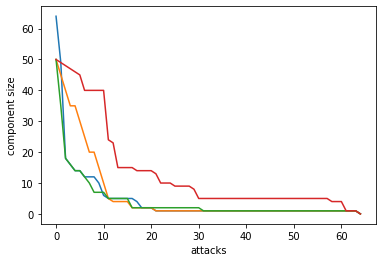

In [36]:
def allFourAttacks(graph):
    nodes = graph.number_of_nodes()
    
    # 4 forskjellige angrep
    graphs = [graph, graph, graph, graph]
    values = [[0 for _ in range(nodes)] for _ in graphs]
    
    # angriper grafen med forskjellig angrep.
    for attackType in range(0,nodes-1):
        graphs[0] = graphs[0].delete_nodes_attack(n=1, centrality_index="closeness", print_result=False)
        graphs[1] = graphs[1].delete_nodes_attack(n=1, centrality_index="degree", print_result=False)
        graphs[2] = graphs[2].delete_nodes_attack(n=1, centrality_index="betweenness", print_result=False)
        graphs[3] = graphs[3].delete_random_nodes(1, print_result=False)
    
        # finne største komponent for hvert angrep
        for number, graph in enumerate(graphs):
            values[number][attackType] = graphs[number].get_largest_components_size()
    
    plt.xlabel("attacks")
    plt.ylabel("component size")
    # legge til i grafen
    for z in range(4):
        plt.plot(values[z])
   
    
allFourAttacks(ConstructedGraph(expanded=False))

### 4.3.3 Sammenligning av angrepene
Er noen av angrepene bedre enn andre? 
Hvordan gjør tilfeldige feil det?

### 4.3.4 Beregning av kostnad
Kostnaden kan måles med antall kanter per node i nettverket. Beregn kanter per node for VDES med ekstra kanter og VDES uten.

In [37]:
# Hadde problemer med noen bugs, lager derfor VDES på nytt
VDES3 = VDESGraph()

print("- Uten ekstra kanter -")
for node in VDES3:
    print(node,":",len(VDES3.edges(node)))
    
print("\n- Med ekstra kanter -")
for node in VDES2:
    print(node,":",len(VDES2.edges(node)))

- Uten ekstra kanter -
boat0 : 5
boat1 : 4
boat2 : 3
boat3 : 5
boat4 : 5
boat5 : 3
boat6 : 3
boat7 : 2
boat8 : 2
boat9 : 1
satilite0 : 3
satilite1 : 5
radio_tower0 : 5
radio_tower1 : 4

- Med ekstra kanter -
boat0 : 5
boat1 : 4
boat2 : 3
boat3 : 5
boat4 : 5
boat5 : 4
boat6 : 3
boat7 : 3
boat8 : 3
boat9 : 3
satilite0 : 4
satilite1 : 5
radio_tower0 : 5
radio_tower1 : 4


### 4.3.5 Sammenligning med ekstra redundans
* Sammenlign det originale VDES nettverket med VDES nettverket med ekstra redundans ved å plotte en lik graf som i 4.3.2 for begge.
* Ble nettverket sikrere? 
* Er det verdt det?
* Er det alltid verdt det?

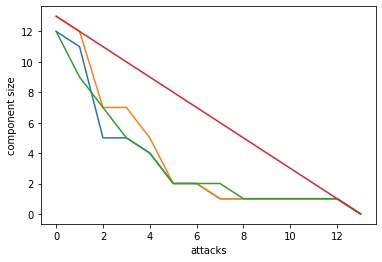

In [39]:
# orginal
allFourAttacks(VDES3)

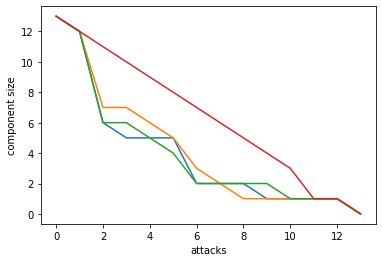

In [40]:
# med ekstra kanter
allFourAttacks(VDES2)

### 4.3.6 Kostnad
Diskuter hvor mye burde man sikre et nettverk med hensyn på redundans?